# Import Required libary


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import seaborn as sns
# for different ML models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint


# Load Dataset

In [ ]:
df = pd.read_csv('/content/harm.csv')

df.head()

Age  Gender Merital Status    Education Residency   Employmet  \
0   39  Female        Married  High School     Rural  Unemployed   
1   39  Female        Married  High School     Rural  Unemployed   
2   30    Male         Single           BA     Urban  Unemployed   
3   30    Male         Single           BA     Urban  Unemployed   
4   27  Female        Married      Diploma     Urban   Household   

  Eonomic.Status  PHQ.9  PVSS.21  Persistance.of.ER  Intensity.of.ER  \
0         Medium     11      127                 11               18   
1         Medium     11      127                 11               18   
2         Medium     18       90                 11               18   
3         Medium     18       90                 11               18   
4           Poor     27       73                 16               28   

   Emotional.Sensitivity  Desire.to.Die  Prepration.for.Suicide  \
0                     28              0                       0   
1                     28              0                       0   
2                     32              3                       6   
3                     32              3                       6   
4                     40              8                      11   

   Actual.Suicide.Desire  Adverse.Childhood.Experience.Total       PRT  \
0                      0                                   1  0.340000   
1                      0                                   1  0.340000   
2                      1                                   1  0.230998   
3                      1                                   1  0.230998   
4                      7                                   1 -0.089518   

   Emotional.Reactivity      Class  
0                    57    No Risk  
1                    57    No Risk  
2                    61   Low Risk  
3                    61   Low Risk  
4                    60  High Risk

In [ ]:
df.shape

(201, 19)

In [ ]:
df.columns

Index(['Age', 'Gender', 'Merital Status', 'Education', 'Residency',
       'Employmet', 'Eonomic.Status', 'PHQ.9', 'PVSS.21', 'Persistance.of.ER',
       'Intensity.of.ER', 'Emotional.Sensitivity', 'Desire.to.Die',
       'Prepration.for.Suicide', 'Actual.Suicide.Desire',
       'Adverse.Childhood.Experience.Total', 'PRT', 'Emotional.Reactivity',
       'Class'],
      dtype='object')

In [ ]:
df['Class'].unique()

array(['No Risk', 'Low Risk', 'High Risk', 'Moderate Risk'], dtype=object)

In [ ]:
df['Education'].unique()

array(['High School', 'BA', 'Diploma', 'MA', 'PhD', nan], dtype=object)

In [ ]:
df['Eonomic.Status'].unique()

array(['Medium', 'Poor', 'Good', 'Very Good'], dtype=object)

# Data Pre-processing

## Impute NULL/Missing values

In [ ]:
df.isnull().sum()

Age                                   0
Gender                                0
Merital Status                        0
Education                             7
Residency                             0
Employmet                             0
Eonomic.Status                        0
PHQ.9                                 0
PVSS.21                               0
Persistance.of.ER                     0
Intensity.of.ER                       0
Emotional.Sensitivity                 0
Desire.to.Die                         0
Prepration.for.Suicide                0
Actual.Suicide.Desire                 0
Adverse.Childhood.Experience.Total    0
PRT                                   0
Emotional.Reactivity                  0
Class                                 0
dtype: int64

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
df['Education'] = imputer.fit_transform(df[['Education']]).ravel()


In [ ]:
df.isnull().sum()

Age                                   0
Gender                                0
Merital Status                        0
Education                             0
Residency                             0
Employmet                             0
Eonomic.Status                        0
PHQ.9                                 0
PVSS.21                               0
Persistance.of.ER                     0
Intensity.of.ER                       0
Emotional.Sensitivity                 0
Desire.to.Die                         0
Prepration.for.Suicide                0
Actual.Suicide.Desire                 0
Adverse.Childhood.Experience.Total    0
PRT                                   0
Emotional.Reactivity                  0
Class                                 0
dtype: int64

In [ ]:
df.describe()

Age       PHQ.9     PVSS.21  Persistance.of.ER  Intensity.of.ER  \
count  201.000000  201.000000  201.000000         201.000000       201.000000   
mean    35.980100   20.029851  101.199005          11.771144        20.796020   
std      9.581211    4.363382   29.539976           3.668428         6.534767   
min     19.000000   11.000000   32.000000           4.000000         8.000000   
25%     30.000000   16.000000   88.000000           8.000000        16.000000   
50%     37.000000   20.000000  110.000000          12.000000        20.000000   
75%     41.000000   23.000000  124.000000          15.000000        27.000000   
max     58.000000   27.000000  130.000000          16.000000        38.000000   

       Emotional.Sensitivity  Desire.to.Die  Prepration.for.Suicide  \
count             201.000000     201.000000              201.000000   
mean               29.721393       4.243781                4.587065   
std                 8.729948       3.047175                4.646895   
min                 8.000000       0.000000                0.000000   
25%                22.000000       2.000000                0.000000   
50%                30.000000       3.000000                4.000000   
75%                38.000000       7.000000                8.000000   
max                40.000000      10.000000               14.000000   

       Actual.Suicide.Desire  Adverse.Childhood.Experience.Total         PRT  \
count             201.000000                          201.000000  201.000000   
mean                2.273632                           14.432836   -0.156284   
std                 2.994954                            9.108058    0.317793   
min                 0.000000                            1.000000   -0.680100   
25%                 0.000000                            6.000000   -0.404800   
50%                 1.000000                           13.000000   -0.101000   
75%                 3.000000                           24.000000    0.024000   
max                14.000000                           27.000000    0.360000   

       Emotional.Reactivity  
count            201.000000  
mean              58.502488  
std               22.778087  
min               20.000000  
25%               40.000000  
50%               60.000000  
75%               84.000000  
max               86.000000

## **EDA Analysis** for Data visualization

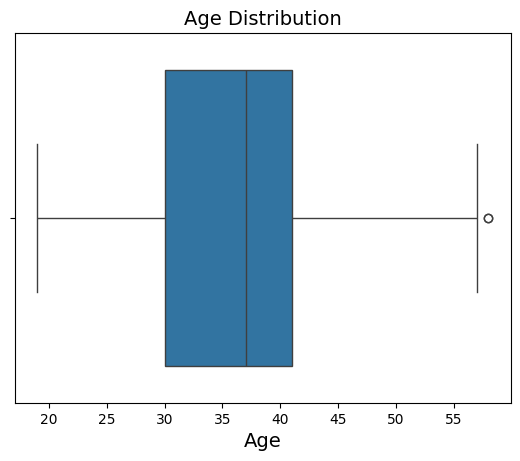

In [ ]:
sns.boxplot(x=df['Age'])
plt.title('Age Distribution')
plt.show()


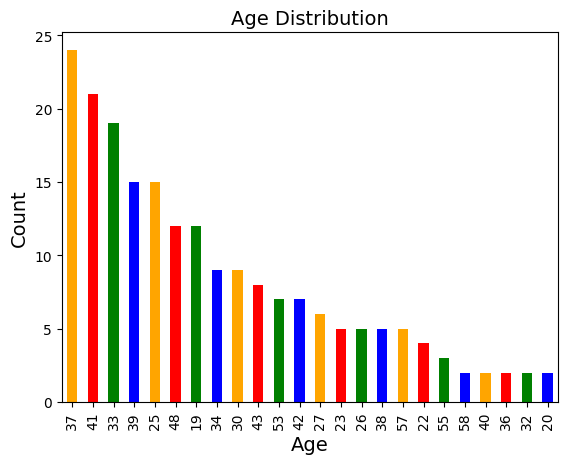

In [ ]:
df['Age'].value_counts().plot(kind='bar', color=[ 'orange','red','green','blue'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

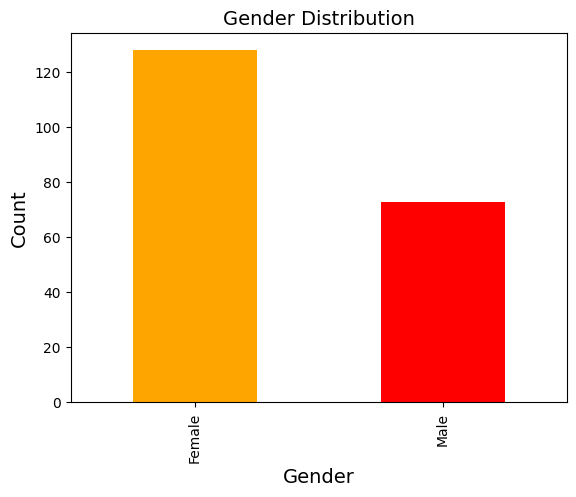

In [ ]:
df['Gender'].value_counts().plot(kind='bar', color=[ 'orange','red','green','blue'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

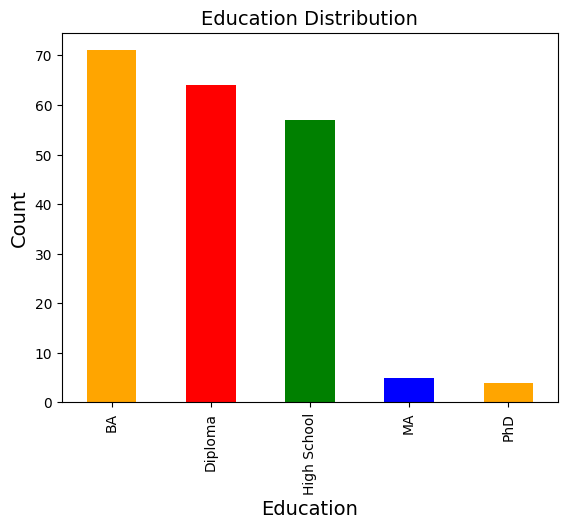

In [ ]:

df['Education'].value_counts().plot(kind='bar', color=[ 'orange','red','green','blue'])
plt.title('Education Distribution')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

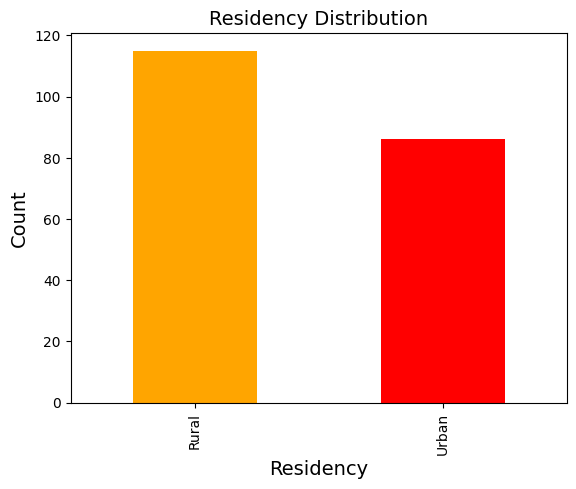

In [ ]:

df['Residency'].value_counts().plot(kind='bar', color=[ 'orange','red','green','blue'])
plt.title('Residency Distribution')
plt.xlabel('Residency')
plt.ylabel('Count')
plt.show()

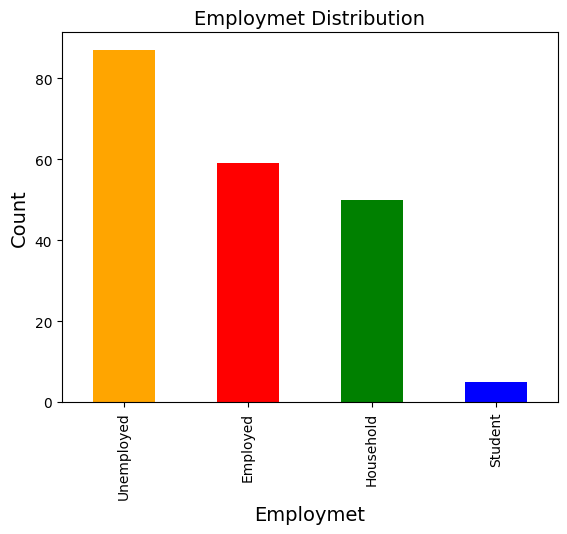

In [ ]:

df['Employmet'].value_counts().plot(kind='bar', color=[ 'orange','red','green','blue'])
plt.title('Employmet Distribution')
plt.xlabel('Employmet')
plt.ylabel('Count')
plt.show()

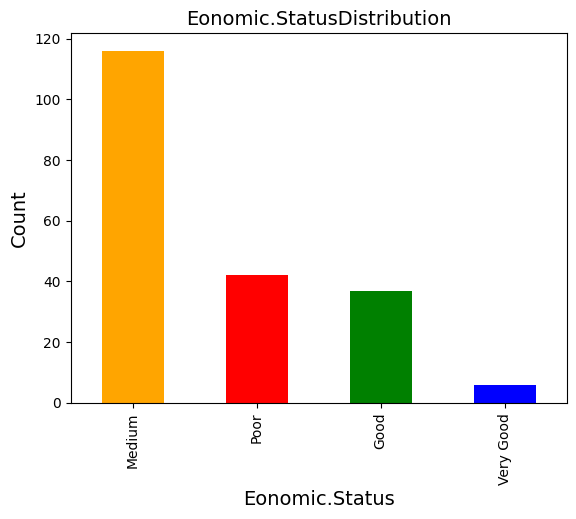

In [ ]:

df['Eonomic.Status'].value_counts().plot(kind='bar', color=[ 'orange','red','green','blue'])
plt.title('Eonomic.StatusDistribution')
plt.xlabel('Eonomic.Status')
plt.ylabel('Count')
plt.show()

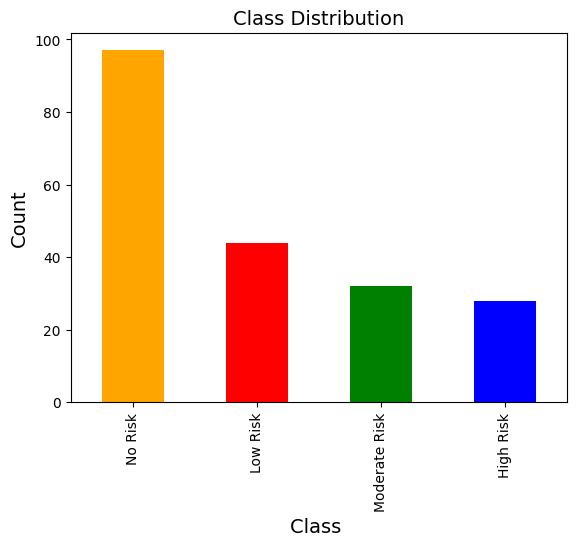

In [ ]:

df['Class'].value_counts().plot(kind='bar', color=[ 'orange','red','green','blue'])
plt.title('Class Distribution')
plt.xlabel('Class ')
plt.ylabel('Count')
plt.show()

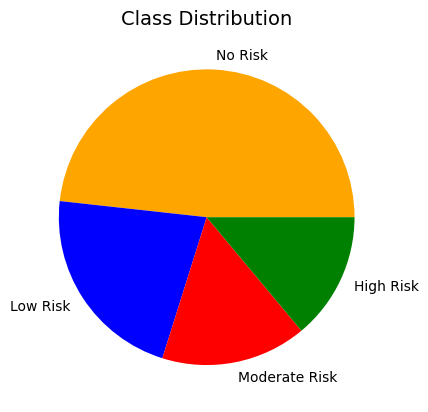

In [ ]:
df['Class'].value_counts().plot(kind='pie', colors=['orange', 'blue', 'red', 'green'])
plt.title('Class Distribution')
plt.ylabel('')
plt.show()

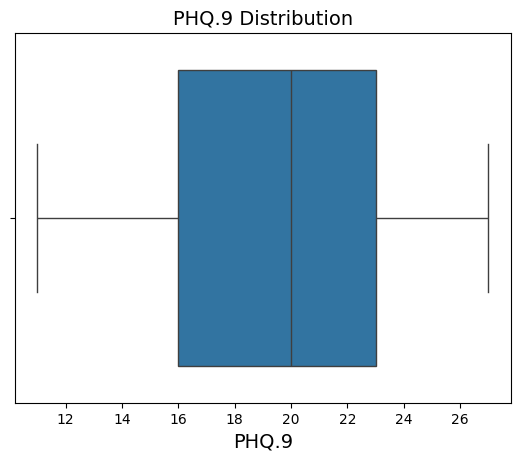

In [ ]:
sns.boxplot(x=df['PHQ.9'])
plt.title('PHQ.9 Distribution')
plt.show()


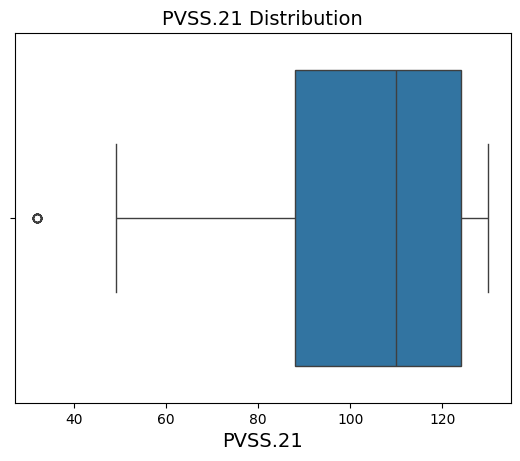

In [ ]:
sns.boxplot(x=df['PVSS.21'])
plt.title('PVSS.21 Distribution')
plt.show()


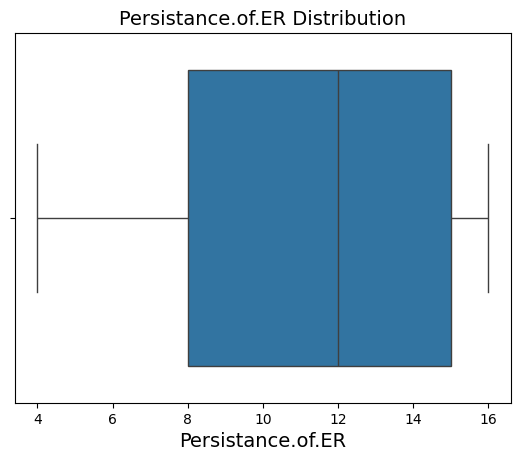

In [ ]:
sns.boxplot(x=df['Persistance.of.ER'])
plt.title('Persistance.of.ER Distribution')
plt.show()


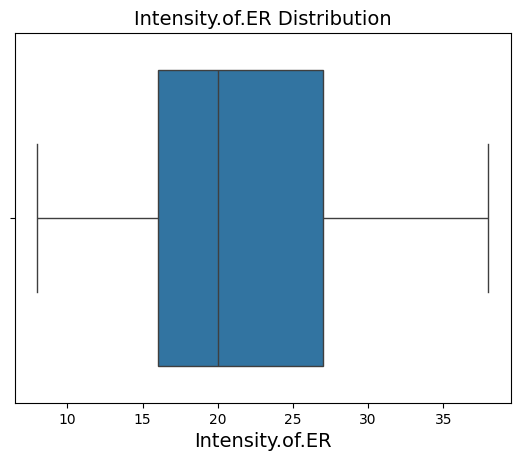

In [ ]:
sns.boxplot(x=df['Intensity.of.ER'])
plt.title('Intensity.of.ER Distribution')
plt.show()


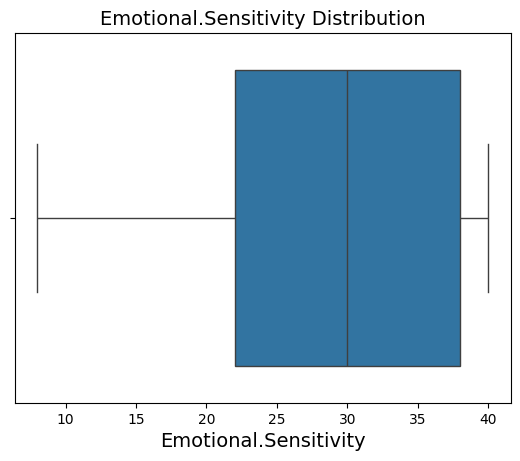

In [ ]:
sns.boxplot(x=df['Emotional.Sensitivity'])
plt.title('Emotional.Sensitivity Distribution')
plt.show()


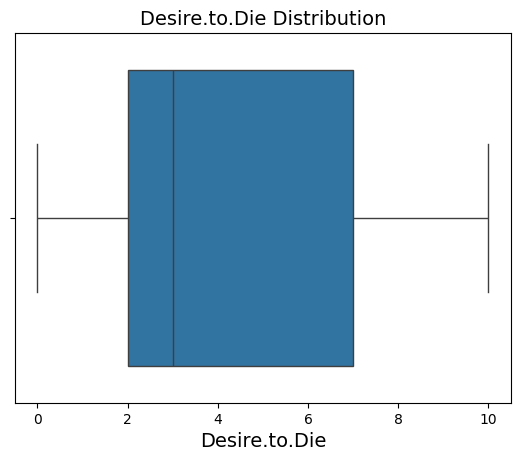

In [ ]:
sns.boxplot(x=df['Desire.to.Die'])
plt.title('Desire.to.Die Distribution')
plt.show()


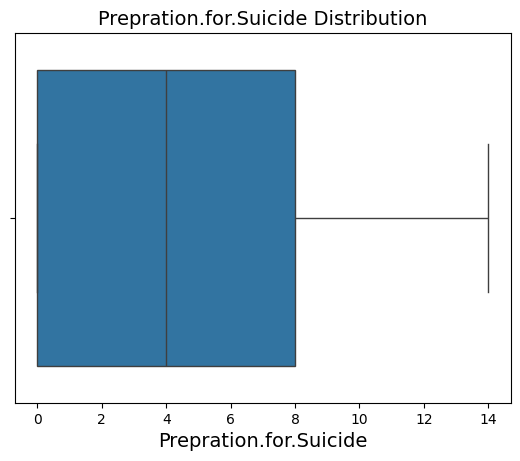

In [ ]:
sns.boxplot(x=df['Prepration.for.Suicide'])
plt.title('Prepration.for.Suicide Distribution')
plt.show()


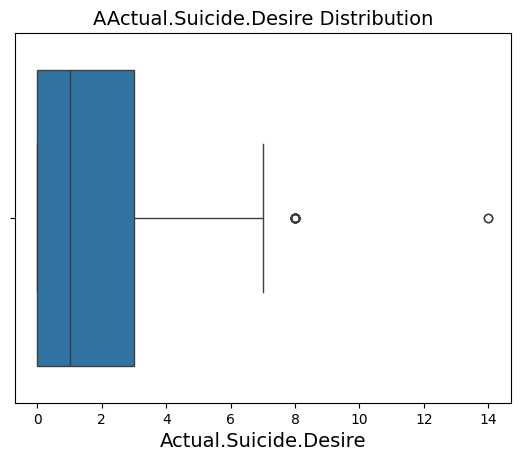

In [ ]:
sns.boxplot(x=df['Actual.Suicide.Desire'])
plt.title('AActual.Suicide.Desire Distribution')
plt.show()


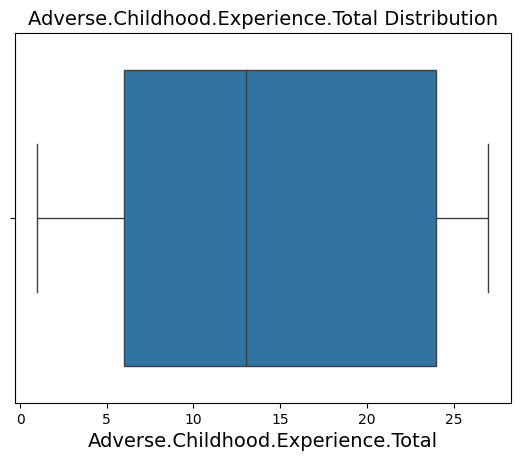

In [ ]:
sns.boxplot(x=df['Adverse.Childhood.Experience.Total'])
plt.title('Adverse.Childhood.Experience.Total Distribution')
plt.show()


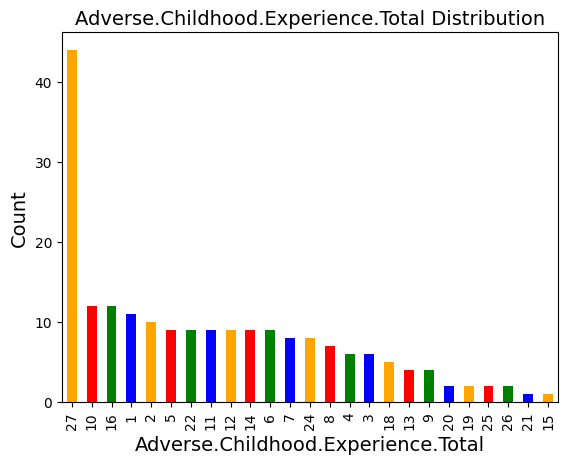

In [ ]:
import matplotlib.pyplot as plt

df['Adverse.Childhood.Experience.Total'].value_counts().plot(kind='bar', color=[ 'orange','red','green','blue'])
plt.title('Adverse.Childhood.Experience.Total Distribution')
plt.xlabel('Adverse.Childhood.Experience.Total')
plt.ylabel('Count')
plt.show()

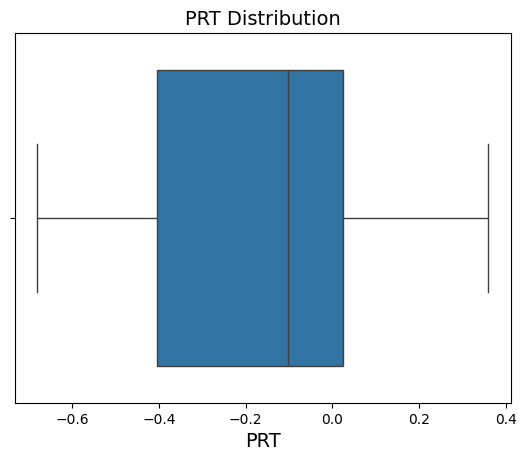

In [ ]:
sns.boxplot(x=df['PRT'])
plt.title('PRT Distribution')
plt.show()


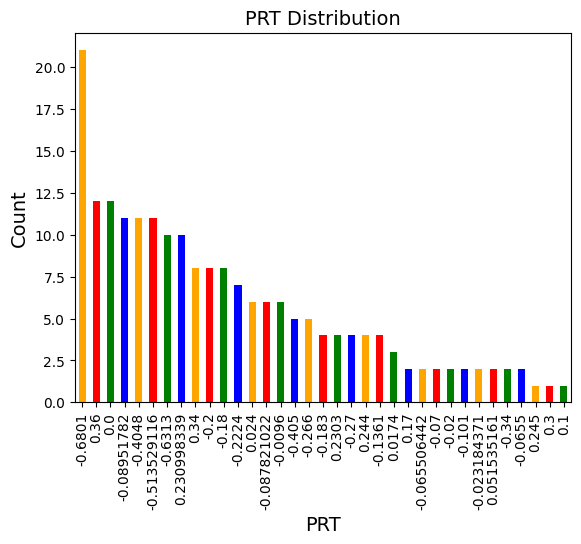

In [ ]:
import matplotlib.pyplot as plt

df['PRT'].value_counts().plot(kind='bar', color=[ 'orange','red','green','blue'])
plt.title('PRT Distribution')
plt.xlabel('PRT')
plt.ylabel('Count')
plt.show()

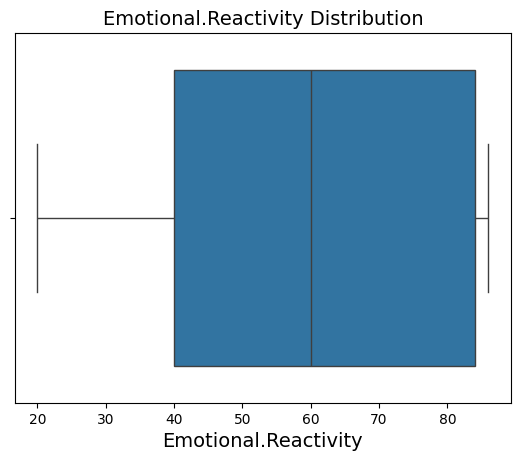

In [ ]:
sns.boxplot(x=df['Emotional.Reactivity'])
plt.title('Emotional.Reactivity Distribution')
plt.show()


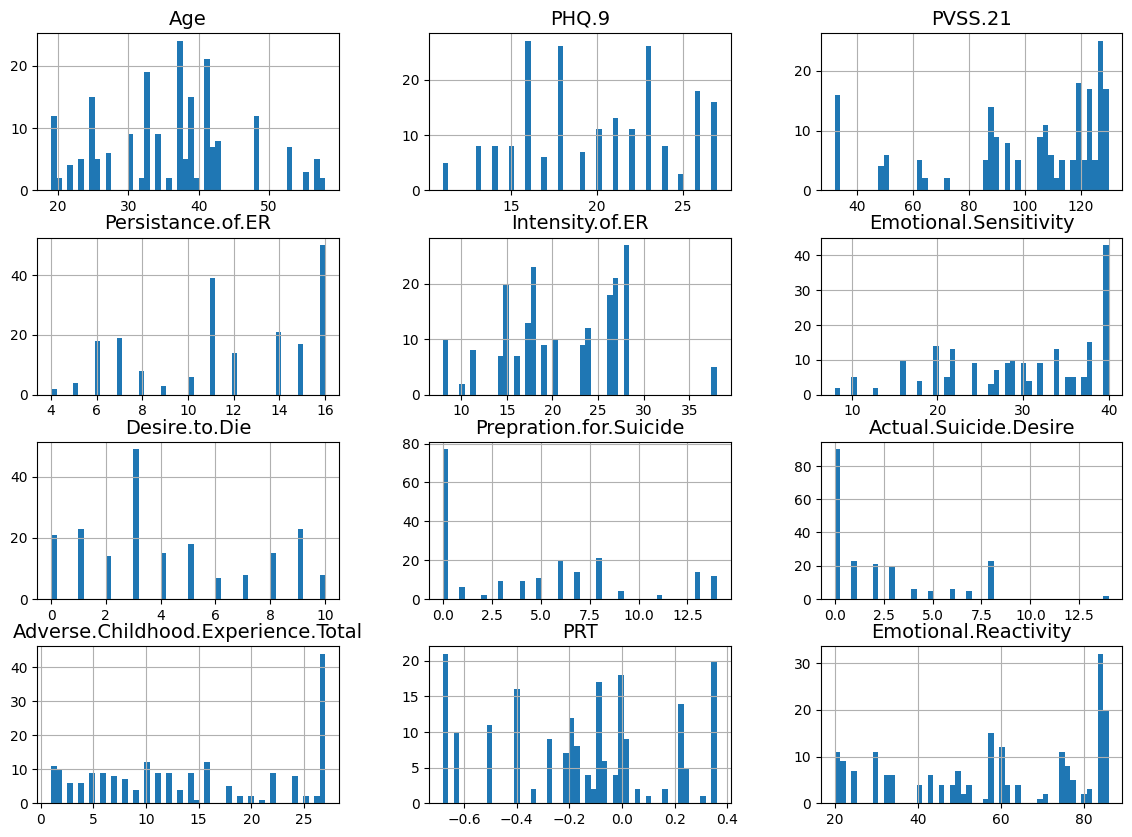

In [ ]:
plt.rc('font', size=15)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
df.hist(bins=50, figsize=(14, 10))

plt.show()

## Feature Engneering Applying one hot and ordinal encoding

In [ ]:
marital_orders=[['Single','Married']]
education_orders=[['High School','Diploma','BA','MA','PhD']]
economic_orders=[['Poor','Medium','Good','Very Good']]
employment_orders = [['Unemployed', 'Household', 'Employed', 'Student']]

In [ ]:
df['Gender'] = OneHotEncoder(sparse_output=False,drop='first').fit_transform(df[['Gender']])
df['Merital Status'] = OrdinalEncoder(categories=marital_orders).fit_transform(df[['Merital Status']])
df['Education'] = OrdinalEncoder(categories=education_orders).fit_transform(df[['Education']])
df['Residency'] = OneHotEncoder(sparse_output=False,drop='first').fit_transform(df[['Residency']])
df['Employmet'] = OneHotEncoder(sparse_output=False,drop='first').fit_transform(df[['Employmet']])
df['Eonomic.Status'] = OrdinalEncoder(categories=economic_orders).fit_transform(df[['Eonomic.Status']])

In [ ]:
df

Age  Gender  Merital Status  Education  Residency  Employmet  \
0     39     0.0             1.0        0.0        0.0        0.0   
1     39     0.0             1.0        0.0        0.0        0.0   
2     30     1.0             0.0        2.0        1.0        0.0   
3     30     1.0             0.0        2.0        1.0        0.0   
4     27     0.0             1.0        1.0        1.0        1.0   
..   ...     ...             ...        ...        ...        ...   
196   19     0.0             0.0        0.0        1.0        0.0   
197   19     0.0             0.0        0.0        1.0        0.0   
198   19     0.0             0.0        0.0        1.0        0.0   
199   19     0.0             0.0        0.0        1.0        0.0   
200   37     1.0             1.0        2.0        0.0        0.0   

     Eonomic.Status  PHQ.9  PVSS.21  Persistance.of.ER  Intensity.of.ER  \
0               1.0     11      127                 11               18   
1               1.0     11      127                 11               18   
2               1.0     18       90                 11               18   
3               1.0     18       90                 11               18   
4               0.0     27       73                 16               28   
..              ...    ...      ...                ...              ...   
196             1.0     27      128                 16               28   
197             1.0     27      128                 16               28   
198             1.0     27      128                 16               28   
199             1.0     27      128                 16               28   
200             0.0     26       88                 15               26   

     Emotional.Sensitivity  Desire.to.Die  Prepration.for.Suicide  \
0                       28              0                       0   
1                       28              0                       0   
2                       32              3                       6   
3                       32              3                       6   
4                       40              8                      11   
..                     ...            ...                     ...   
196                     40              9                      14   
197                     40              9                      14   
198                     40              9                      14   
199                     40              9                      14   
200                     34              9                      13   

     Actual.Suicide.Desire  Adverse.Childhood.Experience.Total       PRT  \
0                        0                                   1  0.340000   
1                        0                                   1  0.340000   
2                        1                                   1  0.230998   
3                        1                                   1  0.230998   
4                        7                                   1 -0.089518   
..                     ...                                 ...       ...   
196                      8                                  27 -0.404800   
197                      8                                  27 -0.404800   
198                      8                                  27 -0.404800   
199                      8                                  27 -0.405000   
200                      8                                  27 -0.513529   

     Emotional.Reactivity      Class  
0                      57    No Risk  
1                      57    No Risk  
2                      61   Low Risk  
3                      61   Low Risk  
4                      60  High Risk  
..                    ...        ...  
196                    84  High Risk  
197                    84  High Risk  
198                    84  High Risk  
199                    84  High Risk  
200                    84  High Risk  

[201 rows x 19 columns]

## Dropping duplicate features

In [ ]:
df = df.drop(['Emotional.Reactivity', 'Desire.to.Die', 'Prepration.for.Suicide', 'Actual.Suicide.Desire'], axis=1)


In [ ]:
df

Age  Gender  Merital Status  Education  Residency  Employmet  \
0     39     0.0             1.0        0.0        0.0        0.0   
1     39     0.0             1.0        0.0        0.0        0.0   
2     30     1.0             0.0        2.0        1.0        0.0   
3     30     1.0             0.0        2.0        1.0        0.0   
4     27     0.0             1.0        1.0        1.0        1.0   
..   ...     ...             ...        ...        ...        ...   
196   19     0.0             0.0        0.0        1.0        0.0   
197   19     0.0             0.0        0.0        1.0        0.0   
198   19     0.0             0.0        0.0        1.0        0.0   
199   19     0.0             0.0        0.0        1.0        0.0   
200   37     1.0             1.0        2.0        0.0        0.0   

     Eonomic.Status  PHQ.9  PVSS.21  Persistance.of.ER  Intensity.of.ER  \
0               1.0     11      127                 11               18   
1               1.0     11      127                 11               18   
2               1.0     18       90                 11               18   
3               1.0     18       90                 11               18   
4               0.0     27       73                 16               28   
..              ...    ...      ...                ...              ...   
196             1.0     27      128                 16               28   
197             1.0     27      128                 16               28   
198             1.0     27      128                 16               28   
199             1.0     27      128                 16               28   
200             0.0     26       88                 15               26   

     Emotional.Sensitivity  Adverse.Childhood.Experience.Total       PRT  \
0                       28                                   1  0.340000   
1                       28                                   1  0.340000   
2                       32                                   1  0.230998   
3                       32                                   1  0.230998   
4                       40                                   1 -0.089518   
..                     ...                                 ...       ...   
196                     40                                  27 -0.404800   
197                     40                                  27 -0.404800   
198                     40                                  27 -0.404800   
199                     40                                  27 -0.405000   
200                     34                                  27 -0.513529   

         Class  
0      No Risk  
1      No Risk  
2     Low Risk  
3     Low Risk  
4    High Risk  
..         ...  
196  High Risk  
197  High Risk  
198  High Risk  
199  High Risk  
200  High Risk  

[201 rows x 15 columns]

In [ ]:
df.shape

(201, 15)

## Apply label enconder in output column

In [ ]:
df['Class'] = LabelEncoder().fit_transform(df['Class'])

# Split Dataset using Sk-fold

In [ ]:
x= df.iloc[:,0:14]
y= df.iloc[:,-1]
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

In [ ]:
x

Age  Gender  Merital Status  Education  Residency  Employmet  \
0     39     0.0             1.0        0.0        0.0        0.0   
1     39     0.0             1.0        0.0        0.0        0.0   
2     30     1.0             0.0        2.0        1.0        0.0   
3     30     1.0             0.0        2.0        1.0        0.0   
4     27     0.0             1.0        1.0        1.0        1.0   
..   ...     ...             ...        ...        ...        ...   
196   19     0.0             0.0        0.0        1.0        0.0   
197   19     0.0             0.0        0.0        1.0        0.0   
198   19     0.0             0.0        0.0        1.0        0.0   
199   19     0.0             0.0        0.0        1.0        0.0   
200   37     1.0             1.0        2.0        0.0        0.0   

     Eonomic.Status  PHQ.9  PVSS.21  Persistance.of.ER  Intensity.of.ER  \
0               1.0     11      127                 11               18   
1               1.0     11      127                 11               18   
2               1.0     18       90                 11               18   
3               1.0     18       90                 11               18   
4               0.0     27       73                 16               28   
..              ...    ...      ...                ...              ...   
196             1.0     27      128                 16               28   
197             1.0     27      128                 16               28   
198             1.0     27      128                 16               28   
199             1.0     27      128                 16               28   
200             0.0     26       88                 15               26   

     Emotional.Sensitivity  Adverse.Childhood.Experience.Total       PRT  
0                       28                                   1  0.340000  
1                       28                                   1  0.340000  
2                       32                                   1  0.230998  
3                       32                                   1  0.230998  
4                       40                                   1 -0.089518  
..                     ...                                 ...       ...  
196                     40                                  27 -0.404800  
197                     40                                  27 -0.404800  
198                     40                                  27 -0.404800  
199                     40                                  27 -0.405000  
200                     34                                  27 -0.513529  

[201 rows x 14 columns]

In [ ]:
y

0      3
1      3
2      1
3      1
4      0
      ..
196    0
197    0
198    0
199    0
200    0
Name: Class, Length: 201, dtype: int64

In [ ]:
y.value_counts()

Class
3    97
1    44
2    32
0    28
Name: count, dtype: int64

In [ ]:
df['Class'].unique()


array([3, 1, 0, 2])

In [ ]:
df

Age  Gender  Merital Status  Education  Residency  Employmet  \
0     39     0.0             1.0        0.0        0.0        0.0   
1     39     0.0             1.0        0.0        0.0        0.0   
2     30     1.0             0.0        2.0        1.0        0.0   
3     30     1.0             0.0        2.0        1.0        0.0   
4     27     0.0             1.0        1.0        1.0        1.0   
..   ...     ...             ...        ...        ...        ...   
196   19     0.0             0.0        0.0        1.0        0.0   
197   19     0.0             0.0        0.0        1.0        0.0   
198   19     0.0             0.0        0.0        1.0        0.0   
199   19     0.0             0.0        0.0        1.0        0.0   
200   37     1.0             1.0        2.0        0.0        0.0   

     Eonomic.Status  PHQ.9  PVSS.21  Persistance.of.ER  Intensity.of.ER  \
0               1.0     11      127                 11               18   
1               1.0     11      127                 11               18   
2               1.0     18       90                 11               18   
3               1.0     18       90                 11               18   
4               0.0     27       73                 16               28   
..              ...    ...      ...                ...              ...   
196             1.0     27      128                 16               28   
197             1.0     27      128                 16               28   
198             1.0     27      128                 16               28   
199             1.0     27      128                 16               28   
200             0.0     26       88                 15               26   

     Emotional.Sensitivity  Adverse.Childhood.Experience.Total       PRT  \
0                       28                                   1  0.340000   
1                       28                                   1  0.340000   
2                       32                                   1  0.230998   
3                       32                                   1  0.230998   
4                       40                                   1 -0.089518   
..                     ...                                 ...       ...   
196                     40                                  27 -0.404800   
197                     40                                  27 -0.404800   
198                     40                                  27 -0.404800   
199                     40                                  27 -0.405000   
200                     34                                  27 -0.513529   

     Class  
0        3  
1        3  
2        1  
3        1  
4        0  
..     ...  
196      0  
197      0  
198      0  
199      0  
200      0  

[201 rows x 15 columns]

## Finding Pearson correlations

In [ ]:
correlations = x_train.corr(method = 'pearson')
correlations

Age    Gender  Merital Status  \
Age                                 1.000000 -0.107040        0.434633   
Gender                             -0.107040  1.000000       -0.251823   
Merital Status                      0.434633 -0.251823        1.000000   
Education                          -0.087361  0.274829       -0.097601   
Residency                          -0.005760  0.039173       -0.122676   
Employmet                           0.289531 -0.469588        0.450235   
Eonomic.Status                     -0.166412 -0.201151       -0.101443   
PHQ.9                              -0.035863 -0.217743        0.172702   
PVSS.21                            -0.188613  0.182344       -0.367343   
Persistance.of.ER                   0.182831 -0.099188        0.228174   
Intensity.of.ER                     0.011860 -0.200398        0.207603   
Emotional.Sensitivity               0.011553 -0.069582        0.200423   
Adverse.Childhood.Experience.Total -0.143050  0.011688        0.011080   
PRT                                 0.152384 -0.042648       -0.056306   

                                    Education  Residency  Employmet  \
Age                                 -0.087361  -0.005760   0.289531   
Gender                               0.274829   0.039173  -0.469588   
Merital Status                      -0.097601  -0.122676   0.450235   
Education                            1.000000  -0.285097  -0.224357   
Residency                           -0.285097   1.000000   0.191795   
Employmet                           -0.224357   0.191795   1.000000   
Eonomic.Status                       0.199924  -0.371796   0.010226   
PHQ.9                               -0.125252   0.010406   0.247963   
PVSS.21                              0.132435  -0.130131  -0.500950   
Persistance.of.ER                   -0.257819   0.206846   0.307486   
Intensity.of.ER                     -0.220611  -0.066906   0.215859   
Emotional.Sensitivity               -0.279765   0.040294   0.250596   
Adverse.Childhood.Experience.Total  -0.208182   0.299065   0.121627   
PRT                                  0.166250  -0.285792  -0.167671   

                                    Eonomic.Status     PHQ.9   PVSS.21  \
Age                                      -0.166412 -0.035863 -0.188613   
Gender                                   -0.201151 -0.217743  0.182344   
Merital Status                           -0.101443  0.172702 -0.367343   
Education                                 0.199924 -0.125252  0.132435   
Residency                                -0.371796  0.010406 -0.130131   
Employmet                                 0.010226  0.247963 -0.500950   
Eonomic.Status                            1.000000 -0.151058  0.052137   
PHQ.9                                    -0.151058  1.000000 -0.456417   
PVSS.21                                   0.052137 -0.456417  1.000000   
Persistance.of.ER                        -0.229793  0.489604 -0.238846   
Intensity.of.ER                          -0.220194  0.563231 -0.222815   
Emotional.Sensitivity                    -0.217502  0.400609 -0.247536   
Adverse.Childhood.Experience.Total       -0.281553  0.363707 -0.320494   
PRT                                       0.345093 -0.283241  0.213017   

                                    Persistance.of.ER  Intensity.of.ER  \
Age                                          0.182831         0.011860   
Gender                                      -0.099188        -0.200398   
Merital Status                               0.228174         0.207603   
Education                                   -0.257819        -0.220611   
Residency                                    0.206846        -0.066906   
Employmet                                    0.307486         0.215859   
Eonomic.Status                              -0.229793        -0.220194   
PHQ.9                                        0.489604         0.563231   
PVSS.21                                     -0.238846        -0.222815   
Persistance.o

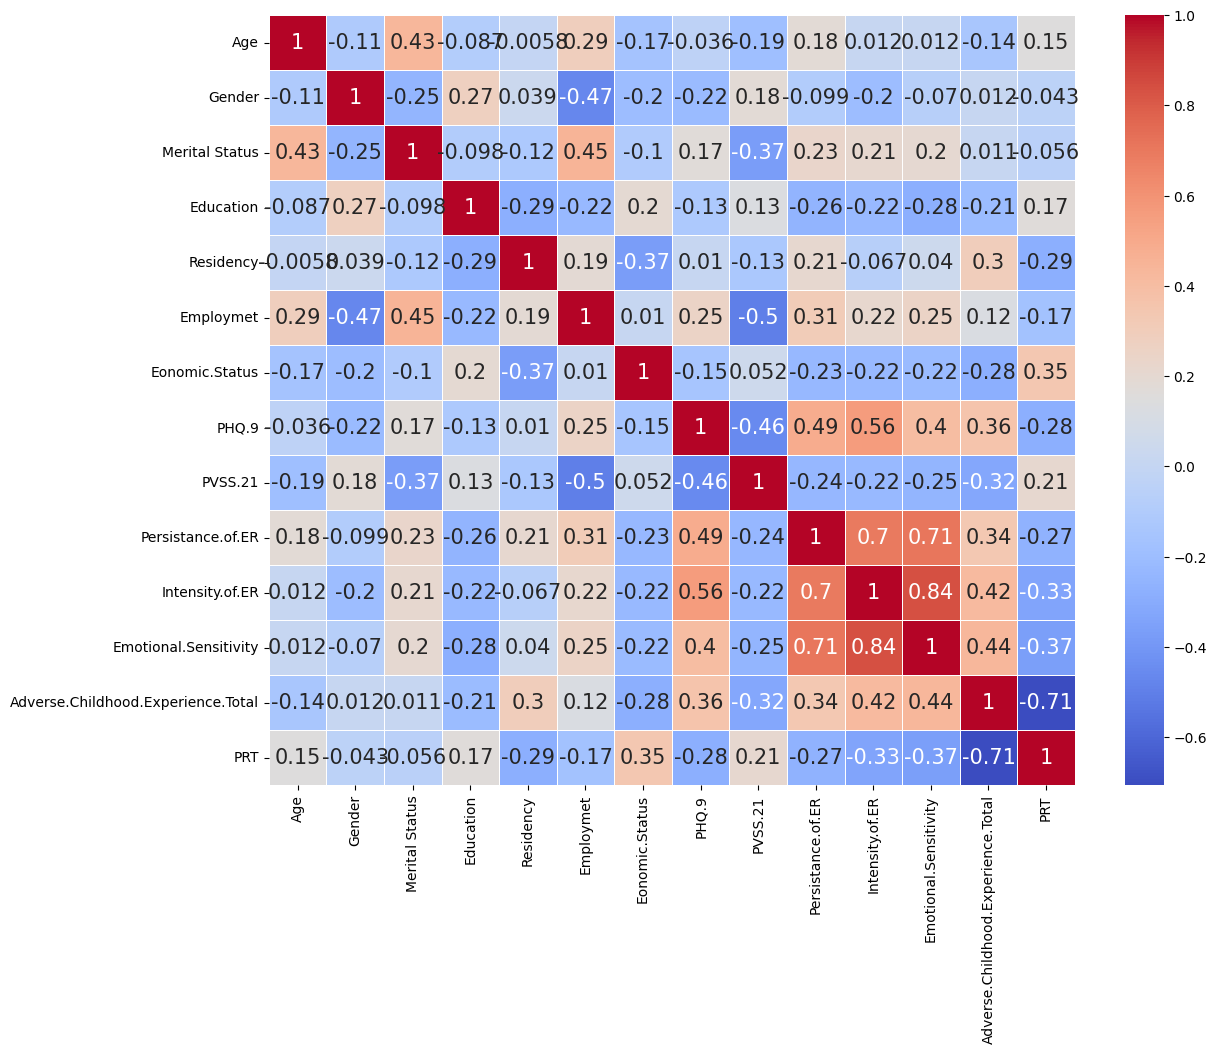

In [ ]:
plt.figure(figsize=(13, 10))
sns.heatmap(correlations, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

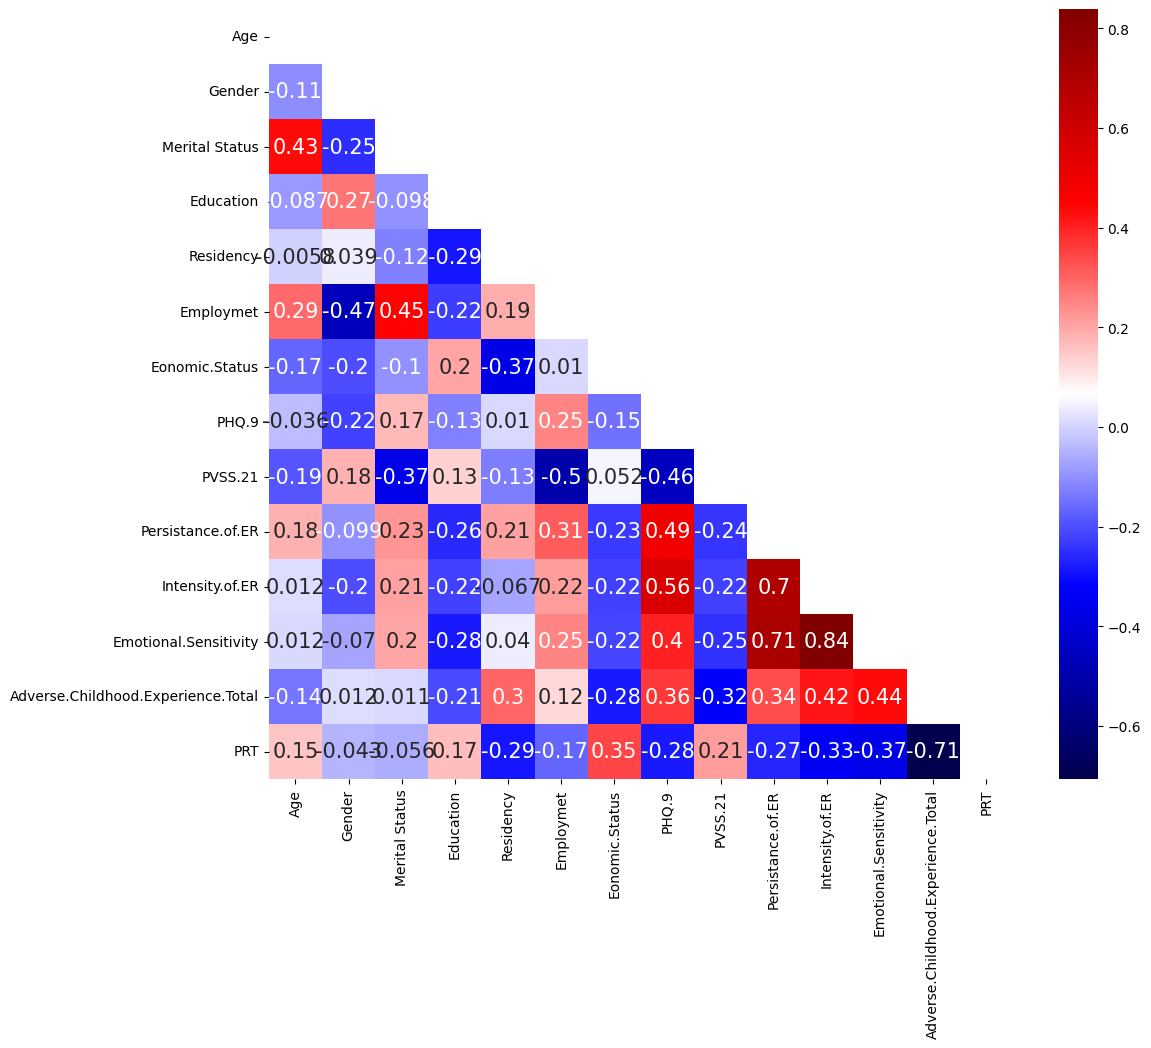

In [ ]:
mask1 = np.triu(np.ones_like(correlations, dtype=bool))
mask2 = np.tril(np.ones_like(correlations, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(correlations, annot = True, cmap = "seismic", mask = mask1);

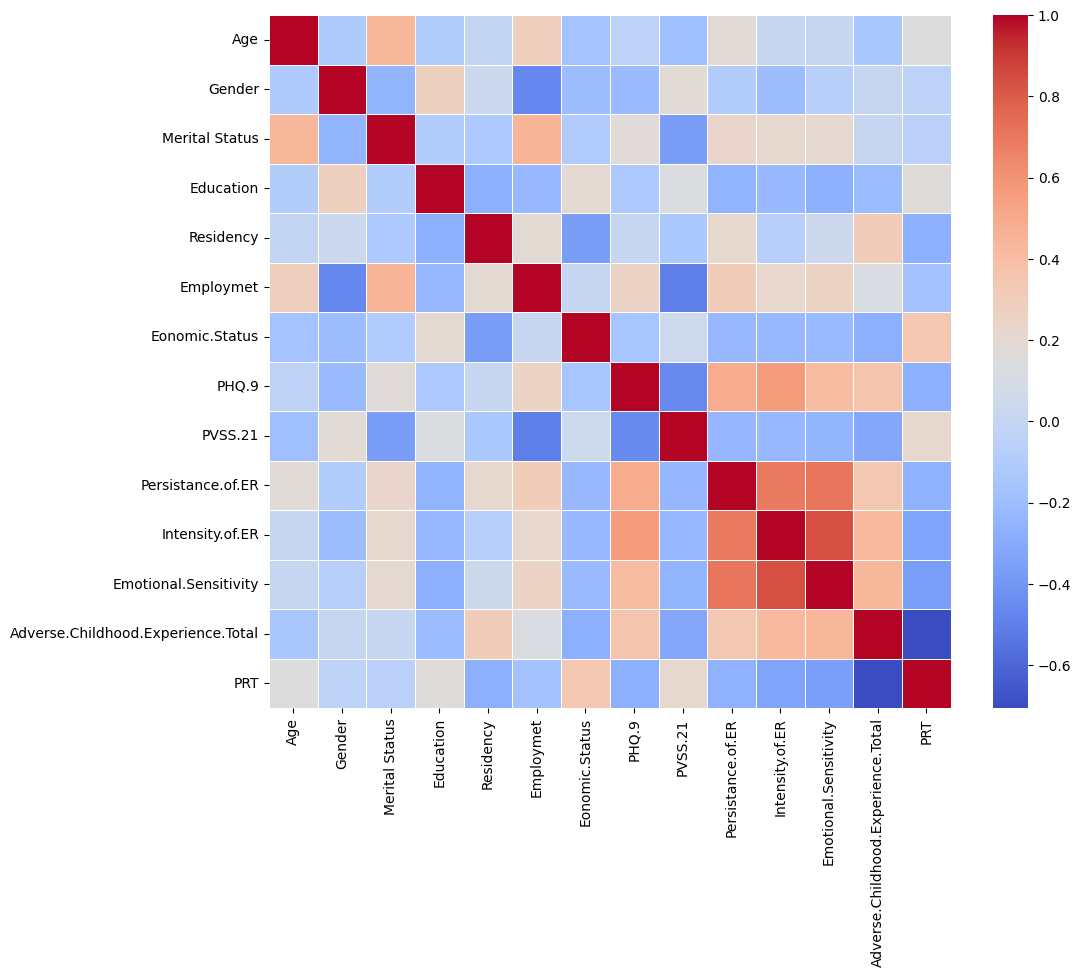

In [ ]:
plt.figure(figsize=(11, 9))
sns.heatmap(correlations, annot=False, cmap='coolwarm', linewidths=0.5)
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(x_train, 0.9) # 85% is a good value of the threshold
print(len(corr_features), 'features dropped')
print(corr_features)

0 features dropped
set()


## Scalling Dataset

In [ ]:
trf2 = ColumnTransformer([
    ('scaler',StandardScaler(),slice(0,19))
],remainder='passthrough')

In [ ]:
trf2.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('scaler', StandardScaler(),
                                 slice(0, 19, None))])

In [ ]:
df

Age  Gender  Merital Status  Education  Residency  Employmet  \
0     39     0.0             1.0        0.0        0.0        0.0   
1     39     0.0             1.0        0.0        0.0        0.0   
2     30     1.0             0.0        2.0        1.0        0.0   
3     30     1.0             0.0        2.0        1.0        0.0   
4     27     0.0             1.0        1.0        1.0        1.0   
..   ...     ...             ...        ...        ...        ...   
196   19     0.0             0.0        0.0        1.0        0.0   
197   19     0.0             0.0        0.0        1.0        0.0   
198   19     0.0             0.0        0.0        1.0        0.0   
199   19     0.0             0.0        0.0        1.0        0.0   
200   37     1.0             1.0        2.0        0.0        0.0   

     Eonomic.Status  PHQ.9  PVSS.21  Persistance.of.ER  Intensity.of.ER  \
0               1.0     11      127                 11               18   
1               1.0     11      127                 11               18   
2               1.0     18       90                 11               18   
3               1.0     18       90                 11               18   
4               0.0     27       73                 16               28   
..              ...    ...      ...                ...              ...   
196             1.0     27      128                 16               28   
197             1.0     27      128                 16               28   
198             1.0     27      128                 16               28   
199             1.0     27      128                 16               28   
200             0.0     26       88                 15               26   

     Emotional.Sensitivity  Adverse.Childhood.Experience.Total       PRT  \
0                       28                                   1  0.340000   
1                       28                                   1  0.340000   
2                       32                                   1  0.230998   
3                       32                                   1  0.230998   
4                       40                                   1 -0.089518   
..                     ...                                 ...       ...   
196                     40                                  27 -0.404800   
197                     40                                  27 -0.404800   
198                     40                                  27 -0.404800   
199                     40                                  27 -0.405000   
200                     34                                  27 -0.513529   

     Class  
0        3  
1        3  
2        1  
3        1  
4        0  
..     ...  
196      0  
197      0  
198      0  
199      0  
200      0  

[201 rows x 15 columns]

In [ ]:
x_train=trf2.transform(x_train)
x_test = trf2.transform(x_test)

# Train model

## Decision Tree

In [ ]:
# Initialize and fit the Decision Tree classifier
Dectree = DecisionTreeClassifier()
Dectree.fit(x_train, y_train)

# Predictions
y_train_pred = Dectree.predict(x_train)  # Train predictions
y_test_pred = Dectree.predict(x_test)    # Test predictions

# Train and Test Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

# Precision, Recall, F1-Score for Test Set
precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

# AUC for binary/multiclass classification (Test Set)
if hasattr(Dectree, "predict_proba"):  # Ensure predict_proba is available
    y_test_binarized = label_binarize(y_test, classes=list(set(y_test)))
    y_test_pred_proba = Dectree.predict_proba(x_test)
    auc = roc_auc_score(y_test_binarized, y_test_pred_proba, average='weighted', multi_class='ovr')
    print("AUC: ", auc)
else:
    print("AUC cannot be calculated as the classifier does not provide probabilities.")


Train Accuracy:  1.0
Test Accuracy:  0.9512195121951219
Precision:  0.9556541019955653
Recall:  0.9512195121951219
F1 Score:  0.9501636574807306
AUC:  0.9523809523809524


### confusion matrix for DT

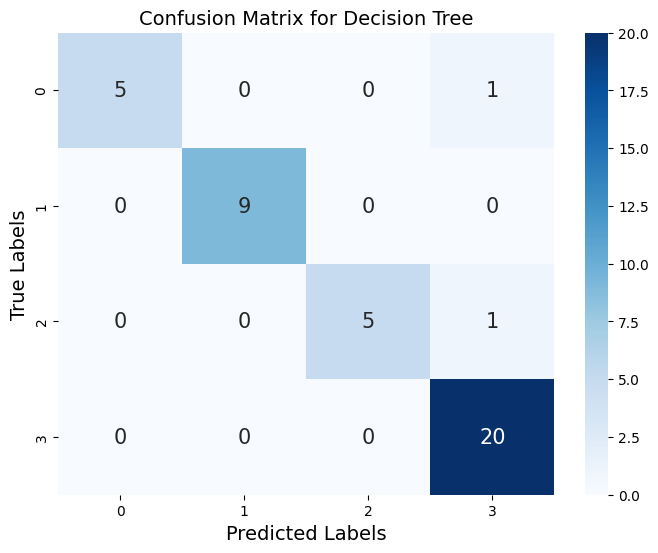

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


In [ ]:
# For binary classification, calculate TP, TN, FP, FN
if cm.shape == (2, 2):  # Only valid for binary classification
    tn, fp, fn, tp = cm.ravel()
    print(f"True Positives (TP): {tp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
else:
    print("Confusion matrix is not binary. Unable to compute TP, TN, FP, FN directly.")

# Optional: Print a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Confusion matrix is not binary. Unable to compute TP, TN, FP, FN directly.

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00         9
           2       1.00      0.83      0.91         6
           3       0.91      1.00      0.95        20

    accuracy                           0.95        41
   macro avg       0.98      0.92      0.94        41
weighted avg       0.96      0.95      0.95        41



## Random Forest


In [ ]:
# Random Forest Classifier
Rand = RandomForestClassifier(n_estimators=100, random_state=42)
Rand.fit(x_train, y_train)

# Predictions
y_pred = Rand.predict(x_test)

# Accuracy
train_accuracy = Rand.score(x_train, y_train)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Training Accuracy: {train_accuracy}")
print(f"Random Forest Testing Accuracy: {test_accuracy}")

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

# AUC for binary/multiclass classification
if hasattr(Rand, "predict_proba"):  # Ensure predict_proba is available
    y_test_binarized = label_binarize(y_test, classes=list(set(y_test)))
    y_pred_proba = Rand.predict_proba(x_test)
    auc = roc_auc_score(y_test_binarized, y_pred_proba, average='weighted', multi_class='ovr')
    print("AUC: ", auc)
else:
    print("AUC cannot be calculated as the classifier does not provide probabilities.")


Random Forest Training Accuracy: 1.0
Random Forest Testing Accuracy: 1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
AUC:  1.0


### Conf. matrix for RF

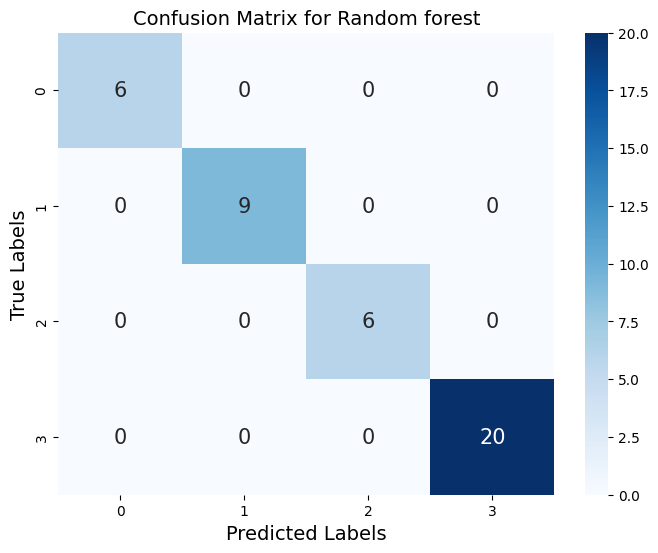

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random forest')
plt.show()

## ADABoost

In [ ]:
# Initialize AdaBoost Classifier
ab = AdaBoostClassifier(n_estimators=100, random_state=42)
ab.fit(x_train, y_train)

# Predictions for Train and Test Sets
y_train_pred = ab.predict(x_train)
y_test_pred = ab.predict(x_test)

# Train and Test Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

# Precision, Recall, F1-Score for Test Set
precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

# AUC for binary/multiclass classification (Test Set)
if hasattr(ab, "predict_proba"):  # Ensure predict_proba is available
    y_test_binarized = label_binarize(y_test, classes=list(set(y_test)))
    y_pred_proba = ab.predict_proba(x_test)
    auc = roc_auc_score(y_test_binarized, y_pred_proba, average='weighted', multi_class='ovr')
    print("AUC: ", auc)
else:
    print("AUC cannot be calculated as the classifier does not provide probabilities.")


Train Accuracy:  0.68125
Test Accuracy:  0.6341463414634146
Precision:  0.7119628339140535
Recall:  0.6341463414634146
F1 Score:  0.6225126811734163
AUC:  0.810140824622532


### conf. matrix for ADA boost

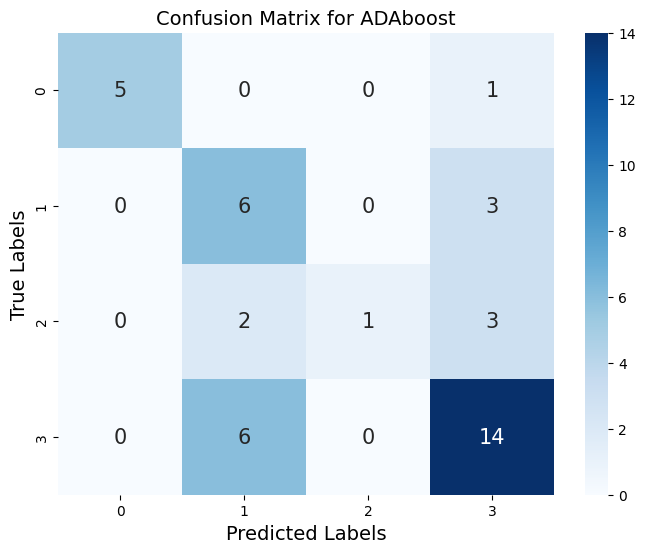

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for ADAboost')
plt.show()

## XGBooster

In [ ]:
# Initialize XGBoost Classifier
xgb = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(x_train, y_train)

# Predictions for Train and Test Sets
y_train_pred = xgb.predict(x_train)  # Train predictions
y_test_pred = xgb.predict(x_test)    # Test predictions

# Train and Test Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

# Precision, Recall, F1-Score for Test Set
precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

# AUC for binary/multiclass classification (Test Set)
if hasattr(xgb, "predict_proba"):  # Ensure predict_proba is available
    y_test_binarized = label_binarize(y_test, classes=list(set(y_test)))
    y_pred_proba = xgb.predict_proba(x_test)
    auc = roc_auc_score(y_test_binarized, y_pred_proba, average='weighted', multi_class='ovr')
    print("AUC: ", auc)
else:
    print("AUC cannot be calculated as the classifier does not provide probabilities.")


Train Accuracy:  1.0
Test Accuracy:  0.9512195121951219
Precision:  0.9556541019955653
Recall:  0.9512195121951219
F1 Score:  0.9501636574807306
AUC:  0.9941927990708478


### conf. matrix for Xgboost

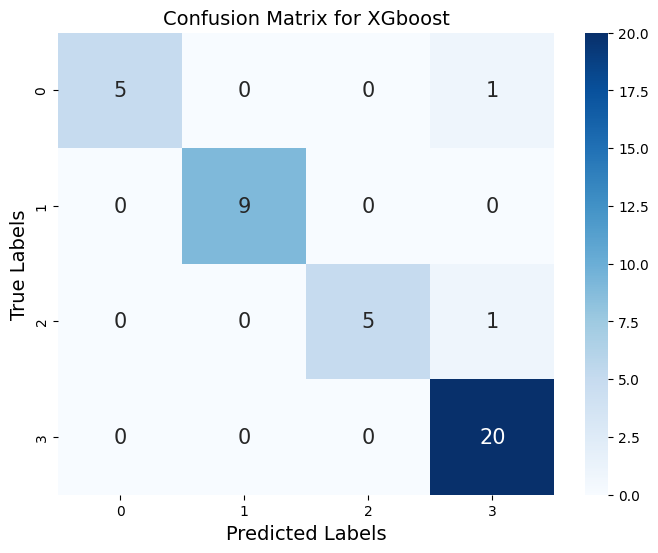

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGboost')
plt.show()


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize

# Initialize Logistic Regression Classifier
lo = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
lo.fit(x_train, y_train)

# Predictions for Train and Test Sets
y_train_pred = lo.predict(x_train)  # Train predictions
y_test_pred = lo.predict(x_test)    # Test predictions

# Train and Test Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

# Precision, Recall, F1-Score for Test Set
precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

# AUC for binary/multiclass classification (Test Set)
if hasattr(lo, "predict_proba"):  # Ensure predict_proba is available
    y_test_binarized = label_binarize(y_test, classes=list(set(y_test)))
    y_pred_proba = lo.predict_proba(x_test)
    auc = roc_auc_score(y_test_binarized, y_pred_proba, average='weighted', multi_class='ovr')
    print("AUC: ", auc)
else:
    print("AUC cannot be calculated as the classifier does not provide probabilities.")


Train Accuracy:  0.91875
Test Accuracy:  0.8048780487804879
Precision:  0.8485345357655258
Recall:  0.8048780487804879
F1 Score:  0.8116362385715515
AUC:  0.9153092334494775


### conf. matrix for logistic regression

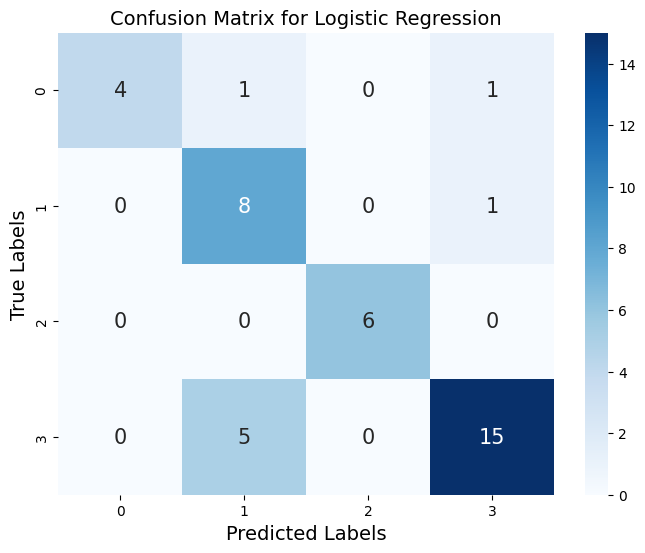

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


## KNN

In [ ]:
# Initialize KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

# Predictions for Train and Test Sets
y_train_pred = knn.predict(x_train)  # Train predictions
y_test_pred = knn.predict(x_test)    # Test predictions

# Train and Test Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train Accuracy: ", train_accuracy)
print("Test Accuracy: ", test_accuracy)

# Precision, Recall, F1-Score for Test Set
precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

# AUC for binary/multiclass classification (Test Set)
if hasattr(knn, "predict_proba"):  # Ensure predict_proba is available
    y_test_binarized = label_binarize(y_test, classes=list(set(y_test)))
    y_pred_proba = knn.predict_proba(x_test)
    auc = roc_auc_score(y_test_binarized, y_pred_proba, average='weighted', multi_class='ovr')
    print("AUC: ", auc)
else:
    print("AUC cannot be calculated as the classifier does not provide probabilities.")


Train Accuracy:  0.94375
Test Accuracy:  0.8292682926829268
Precision:  0.8401155327342748
Recall:  0.8292682926829268
F1 Score:  0.8313475142743435
AUC:  0.9833260743321719


### conf. matrix for KNN

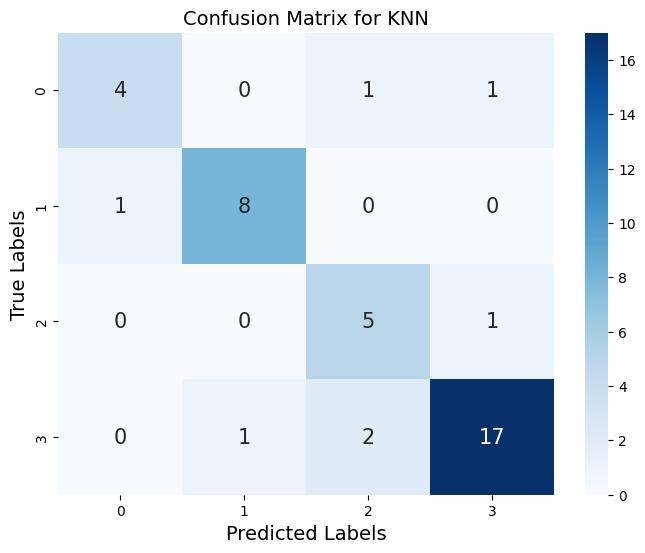

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN')
plt.show()


# ***Upgrading models performance using hyperparameter tuning***

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Adaboost

## Backward feature selection

In [ ]:
y_train = y_train.values.flatten()

In [ ]:
sfs = SFS(ab, k_features='best', forward=False, floating=False, scoring='accuracy',cv=5)
sfs.fit(x_train, y_train)


SequentialFeatureSelector(estimator=AdaBoostClassifier(n_estimators=100,
                                                       random_state=42),
                          forward=False, k_features=(1, 14),
                          scoring='accuracy')

In [ ]:
sfs.k_feature_idx_

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13)

## Hyperparameter Tuning

In [ ]:
# Initialize AdaBoost Classifier
ab = AdaBoostClassifier(random_state=42)

# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 200),  # Random search over 50 to 200 estimators
    'learning_rate': uniform(0.01, 1.0),  # Random search over learning rates between 0.01 and 1
    'algorithm': ['SAMME', 'SAMME.R'],  # Random search over two possible algorithms
}

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=ab,
                                   param_distributions=param_dist,
                                   n_iter=50,  # Number of iterations for random search
                                   cv=5,       # 5-fold cross-validation
                                   n_jobs=-1,  # Use all available CPUs for parallelization
                                   verbose=2,  # Print progress during the search
                                   random_state=42)

# Fit the model
random_search.fit(x_train, y_train)

# Best hyperparameters found during the search
print(f"Best parameters: {random_search.best_params_}")

# Get the best model
best_adaboost = random_search.best_estimator_

# Evaluate the best model on training and testing data
train_accuracy = best_adaboost.score(x_train, y_train)
test_accuracy = best_adaboost.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Predictions for testing set
y_pred = best_adaboost.predict(x_test)
y_pred_proba = best_adaboost.predict_proba(x_test)

# Precision, Recall, F1 Score (Weighted Average)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

# AUC (Area Under the Curve) for multi-class classification
if hasattr(best_adaboost, "predict_proba"):
    y_test_binarized = label_binarize(y_test, classes=list(set(y_test)))
    auc = roc_auc_score(y_test_binarized, y_pred_proba, average='weighted', multi_class='ovr')
    print("AUC: ", auc)
else:
    print("AUC cannot be calculated as the classifier does not provide probabilities.")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'algorithm': 'SAMME', 'learning_rate': 0.8761761457749352, 'n_estimators': 149}
Training Accuracy: 0.91875
Testing Accuracy: 0.7804878048780488
Precision:  0.7875481386392812
Recall:  0.7804878048780488
F1 Score:  0.7834501826799645
AUC:  0.9207970383275262


# Random forest

## Backward feature selection

In [ ]:
rf1= RandomForestClassifier(random_state=42)
sfs = SFS(rf1, k_features='best', forward=False, floating=False, scoring='accuracy',cv=5)

sfs.fit(x_train, y_train)

SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=42),
                          forward=False, k_features=(1, 14),
                          scoring='accuracy')

In [ ]:
sfs.k_feature_idx_

(0, 3, 4, 5, 10)

## Hyperparameter tuning

In [ ]:

# Assuming sfs is a fitted instance of SequentialFeatureSelector
# Transform the data using the selected features
X_train_sel = sfs.transform(x_train)
X_test_sel = sfs.transform(x_test)

# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_sel, y_train)

# Predictions
y_pred = model.predict(X_test_sel)

# Accuracy
train_accuracy = model.score(X_train_sel, y_train)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Precision, Recall, F1 Score (Weighted Average)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

# AUC (Area Under the Curve) for multi-class classification
if hasattr(model, "predict_proba"):  # Ensure the model provides probabilities for AUC calculation
    y_pred_proba = model.predict_proba(X_test_sel)
    y_test_binarized = label_binarize(y_test, classes=list(set(y_test)))  # For multi-class case
    auc = roc_auc_score(y_test_binarized, y_pred_proba, average='weighted', multi_class='ovr')
    print("AUC: ", auc)
else:
    print("AUC cannot be calculated as the classifier does not provide probabilities.")


Training Accuracy: 1.0
Testing Accuracy: 1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
AUC:  1.0


In [ ]:

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 150),          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],            # Maximum depth of the tree
    'min_samples_split': randint(2, 10),        # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 5),          # Minimum number of samples required to be at a leaf node
}

# Initialize RandomForestClassifier (rf1 is assumed to be previously defined)
rf1 = RandomForestClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf1,
                                   param_distributions=param_dist,
                                   n_iter=50,      # Number of parameter settings to try
                                   cv=5,           # 5-fold cross-validation
                                   n_jobs=-1,      # Use all CPU cores
                                   verbose=2,      # Print progress
                                   random_state=42)

# Fit the RandomizedSearchCV model
random_search.fit(X_train_sel, y_train)

# Print the best parameters found by the search
print(f"Best parameters: {random_search.best_params_}")

# Get the best Random Forest model from the random search
best_rf_random = random_search.best_estimator_

# Evaluate the best model on training and testing data
train_accuracy = best_rf_random.score(X_train_sel, y_train)
test_accuracy = best_rf_random.score(X_test_sel, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Predict using the best model
y_pred = best_rf_random.predict(X_test_sel)

# Calculate Precision, Recall, F1 Score (Weighted Average)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

# Calculate AUC (Area Under the Curve)
if hasattr(best_rf_random, "predict_proba"):  # Check if the model provides probabilities
    y_pred_proba = best_rf_random.predict_proba(X_test_sel)
    y_test_binarized = label_binarize(y_test, classes=list(set(y_test)))  # Binarize labels for multi-class
    auc = roc_auc_score(y_test_binarized, y_pred_proba, average='weighted', multi_class='ovr')
    print("AUC: ", auc)
else:
    print("AUC cannot be calculated as the classifier does not provide probabilities.")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 133}
Training Accuracy: 1.0
Testing Accuracy: 1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
AUC:  1.0


# DT

## Backward feature selection

In [ ]:
dt1= DecisionTreeClassifier(random_state=42)
sfs = SFS(dt1, k_features='best', forward=False, floating=False, scoring='accuracy',cv=5)

sfs.fit(x_train, y_train)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(random_state=42),
                          forward=False, k_features=(1, 14),
                          scoring='accuracy')

In [ ]:
sfs.k_feature_idx_

(0, 1, 2, 3, 4, 5, 9, 10, 11)

## Hyperparameter tuning

In [ ]:

# Define the parameter distribution for RandomizedSearchCV

param_dist = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': randint(2, 10),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 10),  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider for splitting
}

# Initialize DecisionTreeClassifier (dt1 should be defined previously)
dt1 = DecisionTreeClassifier(random_state=42)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=dt1,
                                   param_distributions=param_dist,
                                   n_iter=50,
                                   cv=5,
                                   n_jobs=-1,
                                   verbose=2,
                                   random_state=42)

# Fit the RandomizedSearchCV model
random_search.fit(x_train, y_train)

# Print the best parameters found during the search
print(f"Best parameters: {random_search.best_params_}")

# Get the best decision tree model from the random search
best_dt_random = random_search.best_estimator_

# Evaluate the best model on training data
print(f"Training Accuracy: {best_dt_random.score(x_train, y_train)}")

# Predict on the testing data
y_pred = best_dt_random.predict(x_test)

# Accuracy on the test data
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred)}")

# Precision, Recall, F1 Score (Weighted Average)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

# AUC (Area Under the Curve) for multi-class classification
if hasattr(best_dt_random, "predict_proba"):  # Ensure the model provides probabilities
    y_pred_proba = best_dt_random.predict_proba(x_test)
    y_test_binarized = label_binarize(y_test, classes=list(set(y_test)))  # Binarize labels for multi-class
    auc = roc_auc_score(y_test_binarized, y_pred_proba, average='weighted', multi_class='ovr')
    print("AUC: ", auc)
else:
    print("AUC cannot be calculated as the classifier does not provide probabilities.")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training Accuracy: 1.0
Testing Accuracy: 0.9512195121951219
Precision:  0.9556541019955653
Recall:  0.9512195121951219
F1 Score:  0.9501636574807306
AUC:  0.9523809523809524


# Logistic Regression

## Backward feature selection

In [ ]:
lo = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
sfs = SFS(lo, k_features='best', forward=False, floating=False, scoring='r2',cv=5)
sfs.fit(x_train, y_train)

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1000,
                                                       multi_class='multinomial'),
                          forward=False, k_features=(1, 14), scoring='r2')

In [ ]:
sfs.k_feature_idx_

(0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 13)

In [ ]:

# Apply feature selection transformation
x_train_sel = sfs.transform(x_train)
x_test_sel = sfs.transform(x_test)

# Initialize Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

# Fit the model on selected features
model.fit(x_train_sel, y_train)

# Predict on the test set
y_pred = model.predict(x_test_sel)

# Calculate accuracy
train_accuracy = model.score(x_train_sel, y_train)  # Training accuracy
test_accuracy = accuracy_score(y_test, y_pred)  # Testing accuracy
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Calculate precision, recall, and F1 score (weighted average)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

# Calculate AUC (Area Under the Curve)
if hasattr(model, "predict_proba"):  # Ensure the model supports probability predictions
    y_pred_proba = model.predict_proba(x_test_sel)
    y_test_binarized = label_binarize(y_test, classes=list(set(y_test)))  # Binarize labels for multi-class
    auc = roc_auc_score(y_test_binarized, y_pred_proba, average='weighted', multi_class='ovr')
    print("AUC: ", auc)
else:
    print("AUC cannot be calculated as the classifier does not provide probabilities.")


Training Accuracy: 0.9
Testing Accuracy: 0.8048780487804879
Precision:  0.8542128603104213
Recall:  0.8048780487804879
F1 Score:  0.8135733228990044
AUC:  0.8937790360046456


## hyperparameter tuning

In [ ]:

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'multi_class': ['multinomial'],  # Used multinomial for multi-class classification
    'solver': ['newton-cg', 'lbfgs', 'saga'],  # Solver options
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=lo, param_distributions=param_dist,
                                   n_iter=50, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Fit the model using RandomizedSearchCV
random_search.fit(X_train_sel, y_train)

# Best parameters found from RandomizedSearchCV
print(f"Best parameters: {random_search.best_params_}")

# Get the best model from the search
best_log_reg = random_search.best_estimator_

# Training Accuracy
print(f"Training Accuracy: {best_log_reg.score(X_train_sel, y_train)}")

# Predict on the testing data
y_pred = best_log_reg.predict(X_test_sel)

# Testing Accuracy
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred)}")

# Precision, Recall, F1 Score (Weighted Average)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)

# AUC (Area Under the Curve) for multi-class classification
if hasattr(best_log_reg, "predict_proba"):  # Ensure the model provides probabilities
    # Binarize the labels for multi-class classification
    y_test_binarized = label_binarize(y_test, classes=list(set(y_test)))  # Binarize labels for multi-class
    y_pred_proba = best_log_reg.predict_proba(X_test_sel)  # Get the predicted probabilities

    # Calculate AUC using the weighted average of multi-class ROC AUC scores
    auc = roc_auc_score(y_test_binarized, y_pred_proba, average='weighted', multi_class='ovr')
    print("AUC: ", auc)
else:
    print("AUC cannot be calculated as the classifier does not provide probabilities.")


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best parameters: {'solver': 'newton-cg', 'multi_class': 'multinomial', 'C': 10}
Training Accuracy: 0.64375
Testing Accuracy: 0.5853658536585366
Precision:  0.6235797606423269
Recall:  0.5853658536585366
F1 Score:  0.5876752289117575
AUC:  0.8081518583042974


# **Explanable AI**

### For Decision Tree

In [ ]:
import pickle
pickle.dump(Dectree, open('dectree.pkl', 'wb'))

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=c479e0ab8e35741b8206b11fc0e155339ae137eabd544ca19e1ddb4284520dc1
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
from lime import lime_tabular
interepretor=lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=df.columns,

    mode='classification')


In [ ]:
exp=interepretor.explain_instance(
    data_row=x_test[9],
    predict_fn=Dectree.predict_proba)
exp.show_in_notebook(show_table=True)

In [ ]:
# Import the LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer

# Get the class names
class_names = ['No Risk', 'Low Risk','High Risk','Moderate Risk']

# Get the feature names from the original DataFrame (df) before transformation
feature_names = list(df.columns[:-1]) # Exclude the target column ('Class')

# Fit the Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=feature_names,
    class_names=class_names,
    mode='classification')

In [ ]:
explainer=interepretor.explain_instance(
    data_row=x_test[40],
    predict_fn=Dectree.predict_proba)
exp.show_in_notebook(show_table=True)

In [ ]:
explainer=interepretor.explain_instance(
    data_row=x_test[7],
    predict_fn=Dectree.predict_proba)
exp.show_in_notebook(show_table=True)